<a href="https://colab.research.google.com/github/1fastgranada/CSC302_HW3/blob/main/HW3_ARoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier.

**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read WorldCuPMatches.csv to a dataframe
df = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
print(df.head())

   Year              Datetime    Stage         Stadium         City  \
0  1930  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France                4                1         Mexico   
1            USA                3                0        Belgium   
2     Yugoslavia                2                1         Brazil   
3        Romania                3                1           Peru   
4      Argentina                1                0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                     3                     0   
1     

**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year.

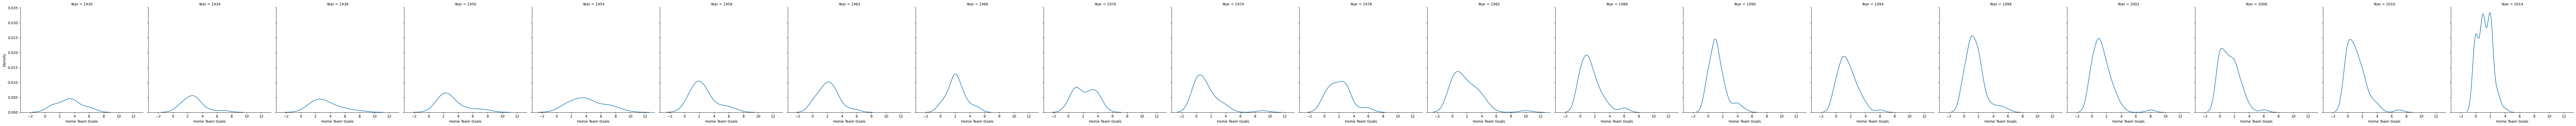

In [13]:
sns.displot(df, x='Home Team Goals', col='Year', kind='kde' )

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

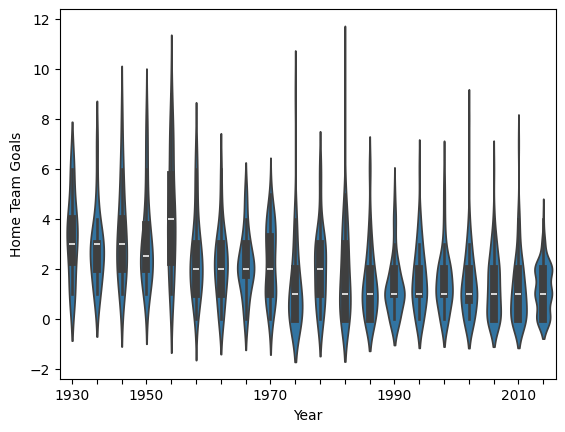

In [33]:
ax = sns.violinplot(data=df, x='Year', y='Home Team Goals')  # Create a violin plot using seaborn:
years = sorted(df['Year'].unique())  # Get the unique years from the 'Year' column
labels = [str(year) if str(year).endswith('0') else '' for year in years]  # Keep years that end with '0', otherwise use an empty string.
ax.set_xticks(range(len(years))) # define the number of ticks based to prevent warning about fixed number of ticks
ax.set_xticklabels(labels)
plt.show() # hide the extra text that was coming up and only show the chart

**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [34]:
!pip install joypy

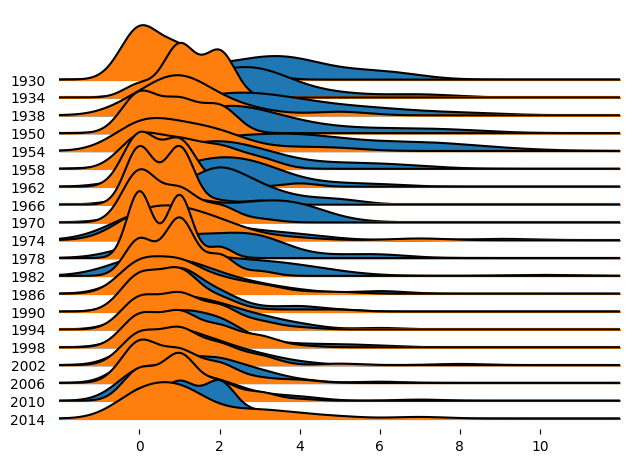

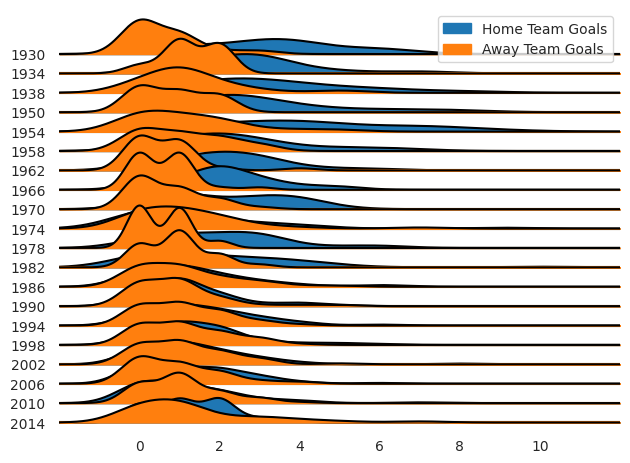

In [42]:
import joypy as jp
import seaborn as sns # had to import seaborn as it wasn't available in the matplotlib.pyplot imported above

jp.joyplot(data=df, column=['Home Team Goals', 'Away Team Goals'], by='Year')
plt.show()

sns.set_style('white') # use seaborn white (I don't see the difference, but I'm not getting an error anymore...)
jp.joyplot(data=df, column=['Home Team Goals', 'Away Team Goals'], by='Year', legend=True)
plt.show()

**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line.

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals.



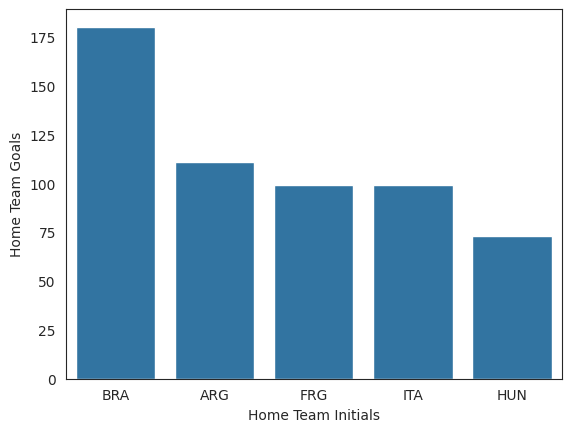

In [48]:
sum_home_goals = df.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()
top_countries = sum_home_goals.sort_values(by='Home Team Goals', ascending=False)
top_5_countries = top_countries.head(5)
sns.barplot(data=top_5_countries, x='Home Team Initials', y='Home Team Goals')
plt.show()

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



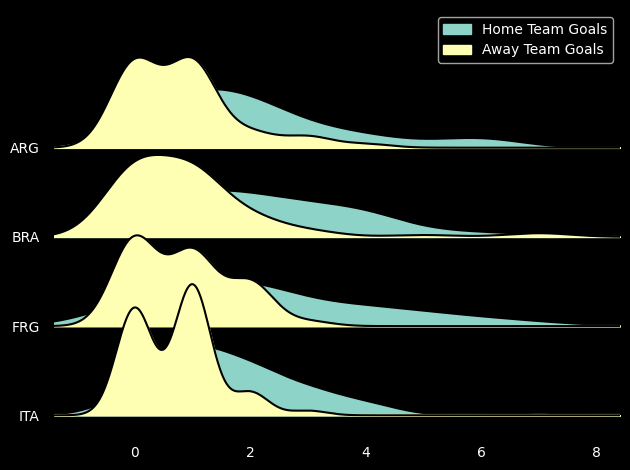

In [51]:
sum_home_goals = df.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()
top_countries = sum_home_goals.sort_values(by='Home Team Goals', ascending=False)
top_4_countries = top_countries['Home Team Initials'].head(4).tolist()
top_4_df = df[df['Home Team Initials'].isin(top_4_countries)]
plt.style.use('dark_background')
jp.joyplot(data=top_4_df, column=['Home Team Goals', 'Away Team Goals'], by='Home Team Initials', legend=True)
plt.show()


**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [52]:
!pip install seaborn_qqplot

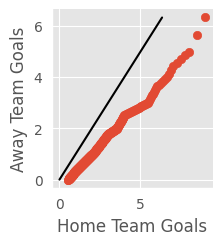

In [59]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('ggplot') #this is to change the color theme.
pplot(df, x='Home Team Goals', y='Away Team Goals', kind='qq', display_kws={'identity':True})
plt.show()

Based on the output of the QQ plot, we can infer the following:
* The overall upward trend indicates a positive correlation between Home Team Goals and Away Team Goals. This means that generally speaking, when there are more Home Team Goals in a game, there's also a tendancy for more Away Team Goals. However, we can see a clear deviation from the 45-degree identity line.

* The left side of the chart shows that when both teams score very few goals, the distributions are very similar.

* The middle of the chart (around 5 Home Team Goals) show the points falling consistently below the identity line, indicating that the number of Home Team Goals tend to be higher than the number of Away Team Goals in this range. This means the average or median number of Home Team Goals is likely higher than the median number of Away Team Goals.

* The right side of the chart indicate the points are continuing the diverge away from the identity line, indicating the greater score disparity at higher goal counts.

The distributions of the Home and Away Team Goals do not align with each other as indicated by the departure from the 45 degree identity line, and Home Teams tend to score more goals than the Away Team, and is more pronounced the greater the number of goals scored in a game.